In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

dfSC = pd.read_pickle('Demand_DHLSC.pkl')
dfP = pd.read_pickle('DHL_parcel_demand.pkl')

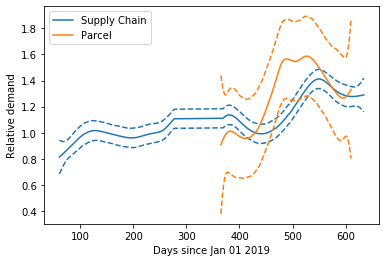

In [44]:
SCdates = []
SCn = np.zeros(len(dfSC['Dates']))
Pn = np.zeros(len(dfP['Dates']))
i = 0
Jan0119 = dt.datetime.strptime('01/01/19','%d/%m/%y')
for d in dfSC['Dates']:
    SCdates.append(dt.datetime.strptime(d,'%d/%m/%y'))
    delta = SCdates[-1] - Jan0119
    SCn[i] = delta.days
    i += 1
    
i = 0
Pdates = []
for d in dfP['Dates']:
    Pdates.append(dt.datetime.strptime(d,'%d/%m/%y'))
    delta = Pdates[-1] - Jan0119
    Pn[i] = delta.days
    i += 1
SCmean = np.mean(dfSC['Demand'][SCn < 450])
plt.plot(SCn,dfSC['Demand']/SCmean ,c='C0',label = 'Supply Chain')
plt.plot(SCn,dfSC['Demand Lower Conf']/SCmean ,'--',c='C0')
plt.plot(SCn,dfSC['Demand Upper Conf']/SCmean ,'--',c='C0')

Pmean = np.mean(dfP['Demand'][Pn < 450])
plt.plot(Pn,dfP['Demand']/Pmean,label = 'Parcel',c='C1')
plt.plot(Pn,dfP['Demand Lower Conf']/Pmean,'--',c='C1')
plt.plot(Pn,dfP['Demand Upper Conf']/Pmean,'--',c='C1')
plt.xlabel('Days since Jan 01 2019')
plt.ylabel('Relative demand')
plt.legend()
plt.show()
